Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

**NB. Do not add new or remove/cut cells in the notebook. Additionally, do not change the filename of this notebook.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your student number below:

In [1]:
STUDENT_NUMBER = "141927"

---

# Exercises Lecture 2

## Exercise 2.1 (2 points)
 
In the folder for exercise 2 you will find a file called `velocities.txt`, which contains two columns of numbers, the first
representing time $t$ in seconds and the second the $x$-velocity in
 meters per second of a particle, measured once every second from time
$t=0$ to $t=100$.  The first few lines look like this:

```
0	0
1	0.069478
2	0.137694
3	0.204332
4	0.269083
5	0.331656
```

Write a program to do the following:

1. Read in the data and, using the trapezoidal rule, calculate from them the approximate distance traveled by the particle in the $x$ direction as a function of time.  
2. Extend your program to make a graph that shows, on the same plot, both the original velocity curve and the distance traveled as a function of time.


In [5]:
# Part 1 solution:

def distance_travelled(t,v):
    """Calculates the distance travelled using the trapezoid
        t (float sequence) : time (assumed ordered t[i] < t[i+1])
        y (float sequence) : v[i] is the velocity at time t[i]
    Returns:
        s (float sequence): s[i] is the distance travelled at time t[i] calculated via the trapezoidal rule
    """

    # YOUR CODE HERE
    # Trapezoidal rule for non-unoform grid: I(a, b) = 1/2 h0 f(a) + Sum_(k=2->N) [ 1/2 h_k (f(k) + f(k-1)) ]
    # where the function values f(x) are the values v[k], the segment step h_k are the time steps t[k] - t[k-1].
    
    s = []  # distance traveled (m)
    N = len(t)  # number of segments
    
    # s.append(0.5 * v[0] * t[0])  # first point
    s.append(0.0)  # first point
    for k in range(1, N):  # iterate over the normal points
        s.append(s[k-1] + 0.5 * (t[k] - t[k-1]) * (v[k] + v[k-1]))  # cumulated distance traveled at time t[k]
    
    return s
    #raise NotImplementedError()

In [6]:
import numpy as np

assert abs(distance_travelled([0,1,3],[1,1,2])[2] - 4.0 ) < 2e-7



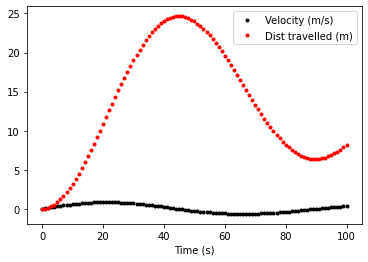

In [7]:
# Part 2 solution:

# YOUR CODE HERE
from matplotlib import pyplot as plt

t = []  # time (s)
v = []  # x-velocities (m/s)
with open("velocities.txt", "r") as file:
    for line in file.readlines():
        line = line.split('\t')
        t.append(int(line[0]))  # first column in file is time in integers
        v.append(float(line[1]))  # second column is velocity in floats
        
s = distance_travelled(t, v)  # calculate distance travelled

# plot results
plt.plot(t, v, 'k.', label='Velocity (m/s)')
plt.plot(t, s, 'r.', label='Dist travelled (m)')
plt.legend()
plt.xlabel('Time (s)')
plt.show()
#raise NotImplementedError()

## Exercise 2.2: Diffraction limit of a telescope (3 Points)

Our ability to resolve detail in astronomical observations is
limited by the diffraction of light in our telescopes.  Light from stars
can be treated effectively as coming from a point source at infinity.  When
such light, with wavelength $\lambda$, passes through the circular aperture
of a telescope (which we'll assume to have unit radius) and is focused by
the telescope in the focal plane, it produces not a single dot, but a
circular diffraction pattern consisting of central spot surrounded by a
series of concentric rings.  The intensity of the light in this diffraction
pattern is given by

$$
I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,
$$

where $r$ is the distance in the focal plane from the center of the
diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.
The Bessel functions $J_m(x)$ are given by

$$
J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta)\,\mathrm{d}\theta,
$$

where $m$ is a nonnegative integer and $x\ge0$.
1. Write a Python function `J(m,x)` that calculates the value of $J_m(x)$ using Simpson's rule with $N=1000$ points. Use your function in a program to make a plot, on a single graph, of the Bessel functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to $x=20$.
2. Make a second program that makes a density plot of the intensity of the circular diffraction pattern of a point light source with $\lambda=500\,$nm, in a square region of the focal plane, using the formula given above.  Your picture should cover values of $r$ from zero up to about $1\,\mu$m.

<b>Hint 1:</b> You may find it useful to know that $\lim_{x\to0}
J_1(x)/x = \frac{1}{2}$. <br>
<b>Hint 2:</b> The central spot in the diffraction pattern is
so bright that it may be difficult to see the rings around it on the
computer screen. If you use `imshow` from `pyplot` you can give `vmax` as additional argument, i.e., `plt.imshow(dp,vmax=0.005)`.
By lowering the `vmax` value, you can reduce the total range
of values between the minimum and maximum brightness, and hence increase
the sensitivity of the plot, making subtle details visible. 
For this exercise a value of `vmax=0.005` appears to work well.

  

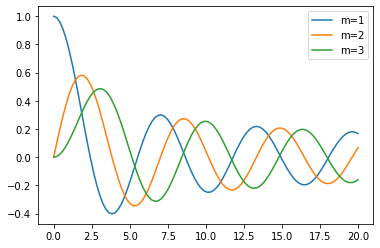

In [21]:
# Part 1 solution:

from math import sin,cos,sqrt,pi

""" Bessel function calculated with Simpson's rule """
def J(m,x):
    # YOUR CODE HERE
    """Bessel function: J(m,x) = 1/pi I(0,pi) [ cos(m theta - x sin theta) d theta ]
    
    Simpson's rule: I(a,b) = (b-a)/3 [ f(a) + f(b) + 4 Sum_(k odd) f(a+kh) + 2 Sum_(k even) f(a+kh)]
    where the sums go over k=1->(N-1) for odd numbers and k=2->(N-2) for even numbers.
    The function f  here is the function from the integrand f(theta) = cos(m theta - x sin theta).
    
    Parameters:
        m (int): nonnegative integer characteristic for the the Bessel function
        x (float): x >= 0
    Returns:
        s (float): the integral value calculated via Simpson's rule
    """
    N = 1000  # iterate theta over 0->pi in 1000 steps
    a = 0
    b = pi
    h = (b-a)/N
    
    f = lambda theta: cos(m*theta - x*sin(theta))  # function f(theta)
    s = f(a) + f(b)  # add the first and last term
    s_odd = 0
    for k in range(1,N,2):
        s_odd += f(a+k*h)  # add the odd k terms
    s_even = 0
    for k in range(2,N,2):
        s_even += f(a+k*h)  # add the even k terms
    s += 4*s_odd  # odd k term multiplied by 4
    s += 2*s_even  # even k term multiplied by 2
    s *= h/3  # multiplier outside the brackets
    
    return s/pi  # remember the 1/pi multiplier in front of the integral
    #raise NotImplementedError()
    
    
from matplotlib import pyplot as plt

# Plot J(m,x) for m = 1,2,3 and x in [0..20]
# X = [x for x in range(21)]
x = np.linspace(0, 20, 100)
S = []
for m in range(3):
    s = []
    for i in range(len(x)):
        s.append(J(m,x[i]))
    S.append(s)

plt.plot(x, S[0], '-', label='m=1')
plt.plot(x, S[1], '-', label='m=2')
plt.plot(x, S[2], '-', label='m=3')
plt.legend()
plt.show()

In [22]:
# Hybrid man/auto

assert abs( J(0,0)-1 )  < 2e-7
assert abs( J(1,0)   )  < 2e-7
assert abs( J(1,5)   + 0.32757913759146534 ) < 2e-7
assert abs( J(2,170) + 0.055868957264523095) < 2e-7
assert abs( J(4,6)   - 0.3576415947809612  ) < 2e-7

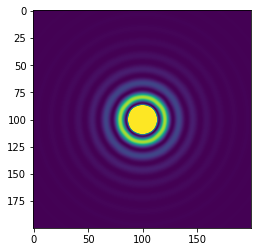

In [23]:
# Part 2 solution

# YOUR CODE HERE
from matplotlib import pyplot as plt
from math import pi,sqrt
import numpy as np

# Density plot of a circular diffraction pattern
def I(r):
    """Calculate the intensity I(r) = [ J(kr) / kr ]^2 with wavelength 500 nm.
        r (float): radial distance from the central spot
    Returns:
        (float): intensity
    """
    lamb = 0.5  # wavelength lambda (microns)
    k = 2*pi/lamb
    
    if r == 0:
        return 0.5  # prevent division by zero
    else:
        return (J(1,k*r)/(k*r))**2

    
N = 200  # number of points for r (N=200: r goes from -100 microns to 100 microns)
intensity = np.zeros((N,N))
sep = 0.02

for i in range(N):
    y = sep*(i-N/2)
    for j in range(N):
        x = sep*(j-N/2)
        r = sqrt(x**2 + y**2)  # radius (microns)
        intensity[i,j] = I(r)

plt.imshow(intensity, vmax=0.005)
plt.show()
#raise NotImplementedError()

## Exercise 2.3: Heat capacity of a solid (3 Points)

Debye's theory of solids gives the heat capacity of a solid at
temperature $T$ to be
$$
C_V = 9V\rho k_B \biggl( {T\over\theta_D} \biggr)^3 \int_0^{\theta_D/T}
      {x^4 \mathrm{e}^x\over(\mathrm{e}^x-1)^2}\,\mathrm{d}x,
$$
where $V$ is the volume of the solid, $\rho$~is the number density of
atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called
\defn{Debye temperature}, a property of solids that depends on their
density and speed of sound.
1. Write a Python function`cv(T)` that calculates $C_V$ for a given value of the temperature, for a sample consisting of 1000 cubic centimeters of solid aluminum, which has a number density of $\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$ and a Debye temperature of $\theta_D=428\,$K.  Use Gaussian quadrature to evaluate the integral, with $N=50$ sample points.
2. Use your function to make a graph of the heat capacity as a function of temperature from $T=5\,$K to $T=500\,$K.


In [24]:
### Run this cell to define gaussxw(N) on your namespace

from math import cos, pi, tan
import numpy as np

######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
# http://www-personal.umich.edu/~mejn/computational-physics/gaussxw.py
#
######################################################################

""" Calculate integration weights for Gaussian quadrature """
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.empty(N,float)
    for i in range(N):
        x[i] = cos(pi*a[i]+1/(8*N*N*tan(a[i])))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w


In [25]:
### Part 1 solution:


def cv(T):
    """ Function to compute heat capacity with Gaussian quadrature """
    # YOUR CODE HERE
    from math import exp
    
    V = 0.001  # sample volume (m^3)
    rho = 6.022e28  # number density (1/m^3)
    kb = 1.38065e-23  # Boltzmann's constant (m2 kg / s^2 K)
    thetaD = 428  # Debye temperature (K)
    
    f = lambda x: (x**4*exp(x))/((exp(x)-1)**2)  # integrand function in the Cv equation

    N = 50
    a = 0.0       # integration limits
    b = thetaD/T  #
    
    x,w = gaussxw(N)  # get integration points and weights
    xp = 0.5*(b-a)*x + 0.5*(b+a)   # map to correct integration domain
    wp = 0.5*(b-a)*w               #
    
    s = 0.0
    for k in range(N):
        s += wp[k]*f(xp[k])  # Gaussian approximation for the integral
    
    cv = 9*V*rho*kb*(T/thetaD)**3*s  # return the Cv equation
    return cv
    #raise NotImplementedError()

In [26]:
assert(abs(cv(300) - 2257.798940261522) < 2e-7) 
assert(abs(cv(5)   - 0.30989444178) < 2e-7) 

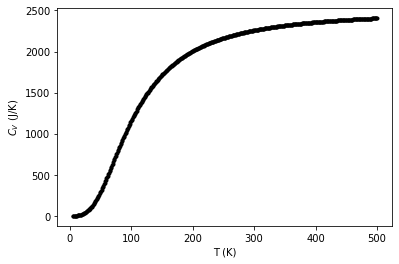

In [27]:
## Part 2 solution

# YOUR CODE HERE
from matplotlib import pyplot as plt

for T in range(5, 501):
    plt.plot(T,cv(T),"k.")

plt.xlabel("T (K)")
plt.ylabel("$C_V$ (J/K)")
plt.show()
#raise NotImplementedError()



## Exercise 2.4: Quantum uncertainty in the harmonic oscillator (5 points)

In units where all the constants are 1, the wavefunction of the
$n$th energy level of the one-dimensional quantum harmonic
oscillator, i.e., a spinless point particle in a quadratic potential
well is given by
$$
\psi_n(x) = {1\over\sqrt{2^n n!\sqrt{\pi}}}\, \mathrm{e}^{-x^2/2}\,H_n(x),
$$
for $n=0\ldots\infty$, where $H_n(x)$ is the $n$th Hermite
polynomial.  Hermite polynomials satisfy a relation somewhat similar to
that for the Fibonacci numbers, although more complex:
$$
H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x).
$$
The first two Hermite polynomials are $H_0(x)=1$ and $H_1(x)=2x$.

1. Write a user-defined function `H(n,x)` that calculates $H_n(x)$ for given $x$ and any integer $n\ge0$. Use your function to make a plot that shows the harmonic oscillator wavefunctions for $n=0, 1, 2, 3$ all on the same graph, in the range $x=-4$ to $x=4$. <b>Hint:</b> There is a function `factorial` in the `math` package that calculates the factorial of an integer.
2. Make a separate plot of the wavefunction for $n=30$ from $x=-10$ to $x=10$. <b>Hint:</b> If your program takes too long to run in this case, then you're doing the calculation wrong; the program should take only a second or so to run.
3. The quantum uncertainty of a particle in the $n$th level of a quantum harmonic oscillator can be quantified by its root-mean-square position $\sqrt{<{x^2}>}$, where
$$
<{x^2}> = \int_{-\infty}^\infty x^2 |\psi_n(x)|^2 \,\mathrm{d}x.
$$
Write a program that evaluates this integral using Gaussian quadrature on
100 points and then calculates the uncertainty (i.e., the root-mean-square
position of the particle) for a given value of $n$. Use your program to
calculate the uncertainty for $n=5$. You should get an answer in the
vicinity of~$\sqrt{<{x^2}>}=2.3$.


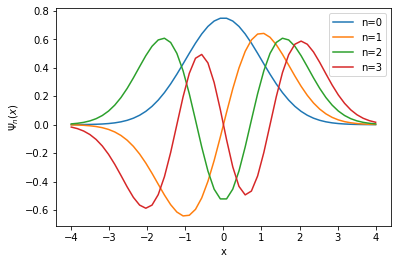

In [40]:
### Part 1 solution
from math import factorial, exp

def H(n,x):
    # YOUR CODE HERE
    if n == 0:
        return 1  # H0(x) = 1
    elif n == 1:
        return 2*x  # H1(x) = 2x
    else:
        return 2*x*H(n-1,x)-2*(n-1)*H(n-2,x)  # return higher order Hermite polynomials recursively
    
    # same in lambda form:
    # return (lambda n,x: 1 if n==0 else (2*x if n==1 else 2*x*H(n-1,x)-2*(n-1)*H(n-2,x)))(n,x)


def psi(n,x):
    return 1 / (sqrt(2**n * factorial(n) * sqrt(pi))) * np.exp(-x**2 / 2) * H(n,x)

    # same in lambda form:
    # return (lambda n,x: 1/(sqrt(2**n*factorial(n)*sqrt(pi)))*exp(-x**2/2) * H(n,x))


x = np.linspace(-4,4,50)  # x for plotting with 50 data points
Psi = []
for n in range(4):
    # s = np.zeros(x.shape)  # save Psi(n,x) values into list with the same shape as x
    # for i in range(len(s)):
    #     s[i] = psi(n,x[i])  # calculate the Hermite polynomial with current n for each point x
    s = psi(n,x)
    Psi.append(s)
    
plt.plot(x,Psi[0],'-',label="n=0")  # plot results in one figure
plt.plot(x,Psi[1],'-',label="n=1")  # plot results in one figure
plt.plot(x,Psi[2],'-',label="n=2")  # plot results in one figure
plt.plot(x,Psi[3],'-',label="n=3")  # plot results in one figure
plt.xlabel("x")
plt.ylabel("$\Psi_n(x)$")
plt.legend()
plt.show()
    
    #raise NotImplementedError()

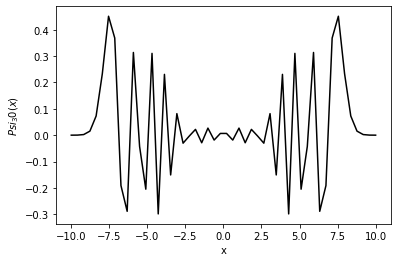

In [42]:
### Part 2 solution:

# YOUR CODE HERE
n = 30
x = np.linspace(-10,10)  # use 100 data points for plotting
s = psi(n,x)  # calculate the Hermitian polynomials using numpy

# plot result
plt.plot(x,s,'k-')
plt.xlabel("x")
plt.ylabel("$Psi_30(x)$")
plt.show()
#raise NotImplementedError()


In [43]:
### Part 3 solution:

# YOUR CODE HERE
def uncertainty(n):
    from math import sqrt,exp,pi,factorial
    
    # The integrand function f(n,x) = |x^2 Phi_n(x)|^2
    # where Phi_n(x) = 1 / sqrt(2^n n! sqrt(pi)) exp(-x^2/2) H_n(x)
    #
    # However, we need to do a change of variables to convert the integration limits:
    # x = z / (1 - z^2), dx = (1 + z^2) / (1 - z^2)^2 dz
    # So the function f(n,x) becomes
    # g(n,z) = (1 + z^2) / (1 - z^2)^2 f(n, z / (1 - z^2))
    # and the integration limits become -1 and 1.
    
    phi = lambda n,x: 1/sqrt(2**n*factorial(n)*sqrt(pi)) * exp(-x**2/2) * H(n,x)
    f = lambda n,x: x**2 * abs(phi(n,x))**2
    g = lambda n,z: (1+z**2)/(1-z**2)**2*f(n,z/(1-z**2))
    
    N = 100  # number of integration points
    a = -1
    b = 1
    
    z,w = gaussxw(N)  # get integration points and weights for Gaussian approximation
    zp = 0.5*(b-a)*z + 0.5*(b+a)   # map to correct integration domain
    wp = 0.5*(b-a)*w               #
    
    s = 0.0
    for k in range(N):
        s += wp[k]*g(n,zp[k])  # Gaussian approximation for the integral
    
    return sqrt(s)


uc = uncertainty(5)
print("Calculated uncertainty with n=5:", uc)
print("Correct value: ~2.3")
    
#raise NotImplementedError()

Calculated uncertainty with n=5: 2.3452078737858177
Correct value: ~2.3


## Exercise 2.5 (2 Points)

Create a user-defined function `f(x)` that returns the value
$1 + \frac{1}{2}\tanh2x$, then use a central difference to calculate the
derivative of the function in the range $-2\le x\le2$.  Calculate an
analytic formula for the derivative and make a graph with your numerical
result and the analytic answer on the same plot.  It may help to plot the
exact answer as lines and the numerical one as dots. <b>Hint:</b> In Python the
tanh function is found in both the `math` and `numpy` packages as `tanh`. The `numpy` version of this and other common mathematical functions may be more accurate and better performing than their `math` versions, as `numpy` is better funded and maintained.


Analytic derivative of $f(x)$ is: $1 - tanh^2 (2x) = 1 - \left( \frac{e^{2x} - e^{-2x}}{e^{2x} + e{-2x}} \right)^2$

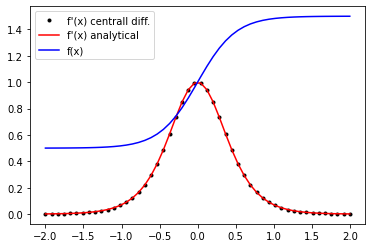

In [44]:
# YOUR CODE HERE
import numpy as np
from matplotlib import pyplot as plt

N = 50  # number of segments on the interval
a = -2
b = 2
h = (b-a)/N  # segment width
x = np.linspace(a,b,N)

f = lambda x: 1 + 0.5*np.tanh(2*x)  # f(x)

df = (f(x+h/2)-f(x-h/2))/h  # f'(x) calculated by central difference
analytical_df = 1-np.tanh(2*x)**2  # f'(x) analytical

# plot results
plt.plot(x,df,"k.",label="f'(x) centrall diff.")
plt.plot(x,analytical_df,"r-",label="f'(x) analytical")
plt.plot(x,f(x),"b-",label="f(x)")
plt.legend()
plt.show()
#raise NotImplementedError()

## Exercise 2.6: Image processing and the STM (5 Points)

When light strikes a surface, the amount falling per unit area
depends not only on the intensity of the light, but also on the angle of
incidence. If the light makes an angle $\theta$ to the normal, it only
"sees" $\cos\theta$ of area per unit of the actual area on the surface:

<img src="light.png" width="500" />

So the intensity of illumination is $a\cos\theta$, if $a$ is the raw
intensity of the light.  This simple physical law is a central element of
3D computer graphics.  It allows us to calculate how light falls on
three-dimensional objects and hence how they will look when illuminated
from various angles.

Suppose, for instance, that we are looking down on the Earth from above and
we see mountains.  We know the height of the mountains $w(x,y)$ as a
function of position in the plane, so the equation for the Earth's
surface is simply $z=w(x,y)$, or equivalently $w(x,y)-z=0$, and the normal
vector $\vec{v}$ to the surface is given by the gradient of $w(x,y)-z$
thus:

$$
\vec{v} =
\nabla [w(x,y)-z] = \begin{pmatrix}
                  \partial/\partial x \\
                  \partial/\partial y \\
                  \partial/\partial z
                \end{pmatrix}
                [w(x,y)-z]
              = \begin{pmatrix}
                  \partial w/\partial x \\
                  \partial w/\partial y \\
                  -1
                \end{pmatrix}.
$$

Now suppose we have light coming in represented by a vector $\vec{a}$ with
magnitude equal to the intensity of the light.  Then the dot product of the
vectors $\vec{a}$ and $\vec{v}$ is

$$
\vec{a}\cdot\vec{v} = |\vec{a}|\,|\vec{v}|\cos\theta,
$$

where $\theta$ is the angle between the vectors. Thus the intensity of
illumination of the surface of the mountains is

$$
I = |\vec{a}| \cos\theta = {\vec{a}\cdot\vec{v}\over|\vec{v}|}
  = {a_x (\partial w/\partial x)
   + a_y (\partial w/\partial y) - a_z\over
     \sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}.
$$

Let's take a simple case where the light is shining horizontally with unit
intensity, along a line an angle $\phi$ counter-clockwise from the
east-west axis, so that $\vec{a}=(\cos\phi,\sin\phi,0)$. Then our
intensity of illumination simplifies to

$$
I = {\cos\phi\,(\partial w/\partial x) + \sin\phi\,(\partial w/\partial y)\over
     \sqrt{(\partial w/\partial x)^2 + (\partial w/\partial y)^2 + 1}}.
$$

If we can calculate the derivatives of the height $w(x,y)$ and we
know $\phi$ we can calculate the intensity at any point.

1. In the folder of exercise 2 you'll find a file called
  `altitude.txt`, which contains the altitude $w(x,y)$ in meters above
   sea level (or depth below sea level) of the surface of the Earth,
   measured on a grid of points $(x,y)$. The data in the file are in the following
   row/column format 
```
w(x1,y1) w(x1,y2) ... w(x1,yn)
w(x2,y1) w(x2,y2) ... w(x2,yn)
.
.
.
w(xn,y1) w(xn,y2) ... w(xn,yn)
```

  Write a program that reads this file and stores the data in an array.  Then calculate the derivatives
  $\partial w/\partial x$ and $\partial w/\partial y$ at each grid point.
  Using multiline comment blocks and inline comments, explain what method you used to calculate them and why. (<b>Hint:</b> You'll probably have to use more than one method to get every grid point,
  because awkward things happen at the edges of the grid.) To calculate
  the derivatives you'll need to know the value of $h$, the distance in
  meters between grid points, which is about $30\,000\,$m in this case.
  (It's actually not precisely constant because we are representing the
  spherical Earth on a flat map, but $h=30\,000\,$m will give reasonable
  results.)
  If you use a central difference, keep in mind that you cannot use points at
  $x+h/2$ and $x-h/2$ because there are no such points - we only have the sample given.
  The formula for the central difference in this case turns to
  
  $$
  \frac{\mathrm{d}f}{\mathrm{d}x} \approx \frac{f(x+h)-f(x-h)}{2h}.
  $$
  
2. Now, using your values for the derivatives, calculate the intensity
  for each grid point, with $\phi=135^\circ$, and make a density plot of the
  resulting values in which the brightness of each dot depends on the
  corresponding intensity value.  If you get it working right, the plot
  should look like a relief map of the world; you should be able to see
  the continents and mountain ranges in 3D.  (Common problems include a map
  that is upside-down or sideways, or a relief map that is "inside-out",
  meaning the high regions look low and vice versa. Work on your program until
  you get a map that looks right to you.)
3. There is another file in the on-line resources called `stm.txt`,
  which contains a grid of values from scanning tunneling microscope
  measurements of the (111) surface of silicon. A scanning
  tunneling microscope (STM) is a device that measures the shape of
  surfaces at the atomic level by tracking a sharp tip over the surface and
  measuring quantum tunneling current as a function of position.  The end
  result is a grid of values that represent the height of the surface as a
  function of position and the data in the file `stm.txt` contain just
  such a grid of values. Modify the program you just wrote to visualize
  the STM data and hence create a 3D picture of what the silicon
  surface looks like. The value of $h$ for the derivatives in this case is
  around $h=2.5$ (in arbitrary units).

In [45]:
# Part 1 solution:

# YOUR CODE HERE
import numpy as np

def calculate_derivatives(data, h):
    """Calculate the derivatives dw/dx and dw/dy are calculated with the central difference,
    except for the edges, where the derivatives are calculated with the forward
    and backward differences in the direction orthogonal to the edge.
    
    Forward difference is used for dw/dy on the top edge and dw/dx on the left edge.
    Backward difference is used for dw/dy on the bottom edge and dw/dx on the right edge.
    The inner points are calculated with central difference. Also, the points on the
    edges that are not in the corners are calculated with central difference in the
    direction parallel to the edge.
    
        data (2d grid of floats): w(x,y) data represented in a 2d numpy array
        h (float): the distance between the points in the grid
    Returns:
        dx,dy (2d grids of floats): a tuple of two 2d numpy arrays, representing the
                                    dw/dx and dw/dy derivatives of w(x,y)
    """
    Ny, Nx = data.shape  # number of rows and columns, respectively
    dy = dx = np.zeros(data.shape)  # initialize empty arrays for dw/dx and dw/dy values
    
    # Calculate inner points
    for y in range(1,Ny-1):  # iterate over inner rows
        for x in range(1,Nx-1):  # iterate over inner columns
            dx[y,x] = (data[y,x+1] - data[y,x-1]) / (2*h)  # dw/dx with central difference for inner points
            dy[y,x] = (data[y+1,x] - data[y-1,x]) / (2*h)  # dw/dy with central difference for inner points
    
    # Calculate the left and right edges
    for y in range(Ny):
        # Derivatives orthogonal to the edge
        dx[y,0] = (data[y,1] - data[y,0]) / h  # forward difference for points at the left edge
        dx[y,-1] = (data[y,-1] - data[y,-2]) / h  # backward difference for points at the right edge
        if y > 0 and y < (Ny-1):  # skip corcers
            # Derivatives parallel to the edge
            dy[y,0] = (data[y+1,x] - data[y-1,x]) / (2*h)  # central difference for points that are on the left edge
            dy[y,-1] = (data[y+1,x] - data[y-1,x]) / (2*h)  # central difference for points that are on the right edge
    
    # Calculate the top and bottom edges
    for x in range(Nx):  # iterate over columns
        # Derivatives orthogonal to the edge
        dy[0,x] = (data[1,x] - data[0,x]) / h  # forward difference for points at the top edge
        dy[-1,x] = (data[-1,x] - data[-2,x]) / h  # backward difference for points ath the bottom edge
        if x > 0 and x < (Nx-1):  # skip corners
            # Derivatives parallel to the edge
            dx[0,x] = (data[y,x+1] - data[y,x-1]) / (2*h)  # dw/dx with central difference for points that are on the top edge
            dx[-1,x] = (data[y,x+1] - data[y,x-1]) / (2*h)  # dw/dx with central difference for points that are on the bottom edge
    
    return dx,dy

h = 30000  # grid point distance (m)
data = np.loadtxt("altitude.txt")  # read the data into 2d-array with nympy
dx,dy = calculate_derivatives(data,h)  # calculate the derivatives
#raise NotImplementedError()

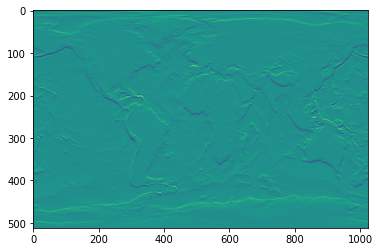

In [46]:
# Part 2 solution

# YOUR CODE HERE
def intensities(phi,dx,dy):
    """Calculate the intensity of light coming at an angle phi on a point (x,y):
    I(x,y) = (cos(phi) dw/dx + sin(phi) dw/dy) / sqrt((dw/dx)^2 + (dw/dy)^2 + 1)
        phi (float): angle of the incoming light in degrees
        dx (float sequence): a 2d-array of derivatives dw/dx at points (x,y)
        dy (float sequence): a 2d-array of derivatives dw/dy at points (x,y)
    Returns:
        I (float sequence): returns a 2d-array of intensities on points (x,y)
    """
    phi = np.pi/180  # convert the degrees into radians
    # utilize the pointwise operations provided by numpy
    return (np.cos(phi)*dx+np.sin(phi)*dy) / np.sqrt(dx**2+dy**2+1)


phi = 135 * pi/180  # convert 135 degrees to radians
I = intensities(phi,dx,dy)  # calculate the intensities

# plot results
plt.figure()
plt.imshow(I,aspect="auto")
plt.show()

#raise NotImplementedError()

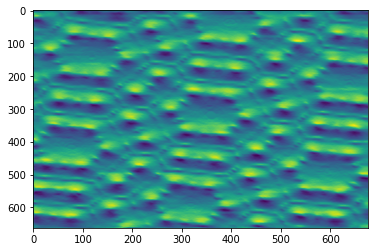

In [47]:
# Part 3 solution

# YOUR CODE HERE
h = 2.5
data = np.loadtxt("stm.txt")
dx,dy = calculate_derivatives(data,h)

phi = 135 * pi/180  # convert 135 degrees to radians
I = intensities(phi,dx,dy)  # calculate the intensities

# plot results
plt.figure()
plt.imshow(I,aspect="auto")
plt.show()

#raise NotImplementedError()